# 05.2 Trends, Smoothing, and Filtering

Understanding the temporal evolution of a time series can provide you with insights about where the data might go next. For that you must understand the trends your data is having. A trend analysis is simply a way to see where you have been to try to understand where you are going.

Since sometimes you might want to present your findings, or remove undesired pieces of data. Remember, you might present you findings to someone without a data analysis background and you might need to adapt your plots

---
## Periodic trends

Let's look at the periodic trend of a natural phenomena: the number of sunspots in the Sun, for a period of more than 200 years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Monthly sunspots
chosen_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

df = pd.read_csv(chosen_file)

In [3]:
df.head()

Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

Let's turn the dataframe into a series:

In [4]:
time_series = df.set_index(df.columns[0])
time_series.index = pd.to_datetime(time_series.index)

In [5]:
time_series.head(10)

Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
1749-06-01      83.5
1749-07-01      94.8
1749-08-01      66.3
1749-09-01      75.9
1749-10-01      75.5

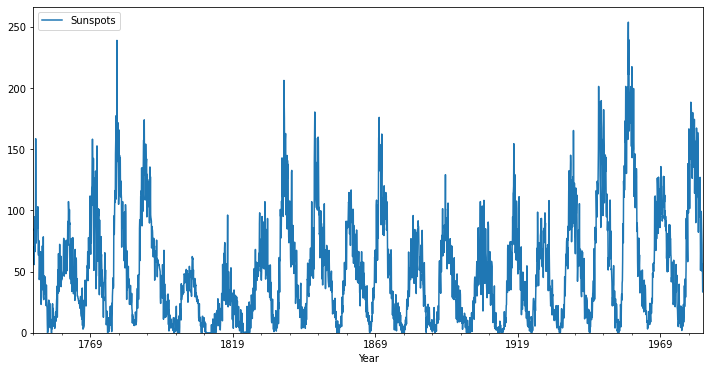

In [10]:
time_series.plot(figsize=(12,6))
#plt.xlim("1919-01-01", "1951-01-01") #To zoom datetime in X with matplotlib, use a string with the same datetime format
#plt.xlim("1919", "1951") ##Remember: datetime is VERY smart, but not intelligent
plt.xlabel("Year")
plt.ylim(bottom=0)
plt.show()

In [18]:
fig, ax = plt.subplots(figsize=(17,8))

fft_sun = np.fft.rfft(time_series.values.flatten()-np.mean(time_series.values.flatten()))

## If the fundamental time step is 1 month, I can only detect events happening every two months, hence a maximum of 0.5 repetitions per month
x = np.linspace(0, 1.0/2.0, len(fft_sun)) #Can only detect half an event per month

## Remember: it is OK to filter out the first 1-2 points, they represent quasi-static trends and are not time-dependent
## To get the time dependent components, you can subtract the average of the signal to the signal
starting_point = 0
ax.plot(x[starting_point:], np.abs(fft_sun)[starting_point:])

ax.set_xlabel("Repetitions per month")
ax.set_ylim(bottom=0)
plt.xlim(0.000, 0.01)
## Repeats every 0.0072 months, so in 1/0.0072 ~ 139 months which is ~ 11 years
## Search for "solar cycle" in a search engine

(0.0, 0.01)

We have seen with the Covid example there was a 7-day feature, as well as both the second and third wave. Here we see the major feature is the 11-year cycle. Based on this, it is possible to extrapolate future points (which we will see later).

<div class="alert alert-info">
    <br>
    <b>Question: In our data, 1969 was a peak in sunspot activity. In which year will the next sunspot peak occur?</b>      
    <br>
    <br>
</div>

Trend analysis is usually much more complicated.
There is a notebook in the examples directory with the [Covid Analysis](../Examples/03-CovidCasesPortugal.ipynb).
There you can find a tougher Fourier analysis.

In [19]:
import datetime as datetime

In [26]:
sunspot_peak = datetime.datetime(1969, 1, 1)
sunsplot_delta = datetime.timedelta(days=11*365)

npeak = 5.0

sunspot_peak + npeak*sunsplot_delta

datetime.datetime(2023, 12, 19, 0, 0)

---
## Smoothing

When you plot too much data, you might introduce graphical artefacts on the visualization.

Smoothing may help you represent data in a better fashion. However, smoothing techniques have their drawbacks.

In [27]:
temp_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

dtemp = pd.read_csv(temp_file)

In [28]:
dtemp.head()

Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

<AxesSubplot:xlabel='Date'>

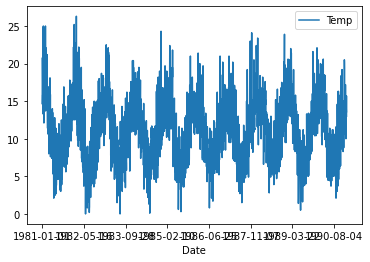

In [29]:
dtemp.plot(x='Date') ## Again, look at the unformatted x-axis

In [30]:
temp_series = dtemp.set_index('Date')
temp_series.index = pd.to_datetime(temp_series.index)

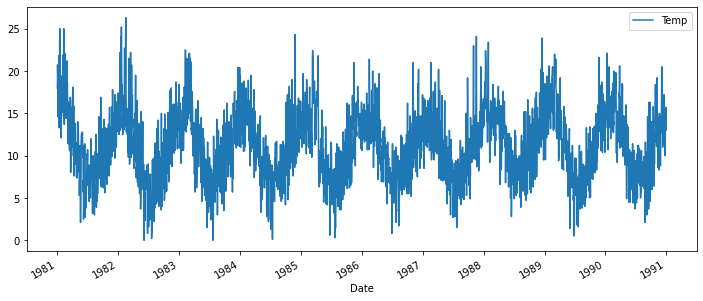

In [31]:
fig, ax = plt.subplots(figsize=(12,5))
temp_series.plot(ax=ax)
plt.show()

The bread and butter of a data analyst if the rolling average. This is good for when we have plenty of points like in this case. Use only with a window that is comparatively small compared with the total number of points.

Although for a simple analysis the rolling average is fine, it may give a wrong insight due to a poorly chosen window size.

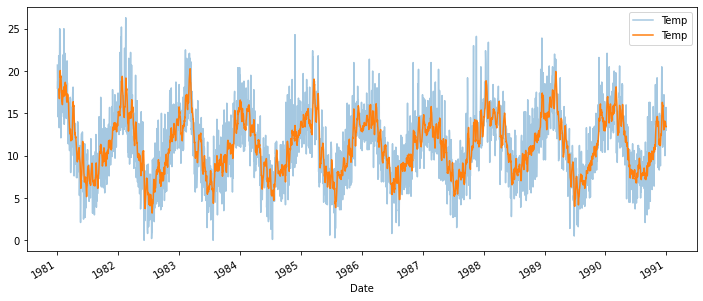

In [35]:
fig, ax = plt.subplots(figsize=(12,5))

temp_series.plot(ax=ax, alpha=0.4)

pts_avg = 10 #100 #200
temp_series.rolling(pts_avg).mean().plot(ax=ax)
plt.show()

An alternative that might be better on ocasion is using a median filter instead of a rolling average. The median filter usually is best at filtering out outliers. It is widely used in photography to [remove moving objects from the desired background](https://medium.com/@nikolasmoya/simple-algorithm-to-remove-moving-objects-from-pictures-cdd3396c68e0). It also adds delays to your smoothed output.

In [40]:
fig, ax = plt.subplots(figsize=(12,5))

temp_series.plot(ax=ax, alpha=0.4)

pts_avg = 29 # 39 # 79
temp_series.rolling(pts_avg).median().plot(ax=ax)
plt.show()

The median filter is best used when you have a ground truth and a few points that "escape" your definition of "good data". Remember that the definition of outlier is in the eye of the beholder.

#### Intermission: a brief word about outliers

What's the outlier in the next sequence?

In [41]:
a = [0, 1, 2, 0, 300, 2]
print(a)

[0, 1, 2, 0, 300, 2]


And in the next one?

In [42]:
npts = 1000

x = np.linspace(0, 90, npts)
y = np.sin(x)
y[200] = 3.0
y[600] = -4.0

print(y)

[ 0.00000000e+00  8.99682743e-02  1.79206840e-01  2.66991906e-01
  3.52611471e-01  4.35371097e-01  5.14599543e-01  5.89654208e-01
  6.59926343e-01  7.24845989e-01  7.83886601e-01  8.36569315e-01
  8.82466836e-01  9.21206901e-01  9.52475299e-01  9.76018422e-01
  9.91645316e-01  9.99229237e-01  9.98708673e-01  9.90087846e-01
  9.73436677e-01  9.48890220e-01  9.16647565e-01  8.76970223e-01
  8.30180007e-01  7.76656419e-01  7.16833576e-01  6.51196685e-01
  5.80278109e-01  5.04653051e-01  4.24934884e-01  3.41770183e-01
  2.55833474e-01  1.67821767e-01  7.84489014e-02 -1.15602421e-02
 -1.01475623e-01 -1.90567963e-01 -2.78114656e-01 -3.63405634e-01
 -4.45749125e-01 -5.24477262e-01 -5.98951503e-01 -6.68567805e-01
 -7.32761531e-01 -7.91012021e-01 -8.42846821e-01 -8.87845512e-01
 -9.25643123e-01 -9.55933086e-01 -9.78469728e-01 -9.93070260e-01
 -9.99616261e-01 -9.98054637e-01 -9.88398056e-01 -9.70724839e-01
 -9.45178328e-01 -9.11965725e-01 -8.71356409e-01 -8.23679750e-01
 -7.69322443e-01 -7.08725

And in the next example?

In [43]:
dfmed = pd.DataFrame({'x':x, 'y':y})

dfmed.plot(x='x', y='y', figsize=(12,5))
plt.show()

#### Remember: defining an outlier is hard.
The median filter, in this case, can clearly filter out the outliers.

In [48]:
dfmed_series = dfmed.set_index('x')
dfmed_series.rolling(3).median().plot(figsize=(12,5))
plt.show()

---
## Seasonality and Trend

Some data can have not just a repeating pattern, but a changing baseline underneath as well.

We all acknowledge most people have a different routine on weekdays than they have during weekends (not us, we're always working). This was completely true pre-pandemic, and it has changed significantly in the present. However, we still have most weekly habits of eating, sleeping, cleaning, etc..

Now you must consider our entire economy is set on top of our habits.

Some things repeat daily, or weekly, of yearly, or...

Let's analyse one of the classic datasets, consisting of air travel between 1949 and 1961 in the US.

In [51]:
## Airline passengers
airline_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

dair = pd.read_csv(airline_file)
## Shampoo sales: This is a surprise for later
##file_4 = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'

In [52]:
dair.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

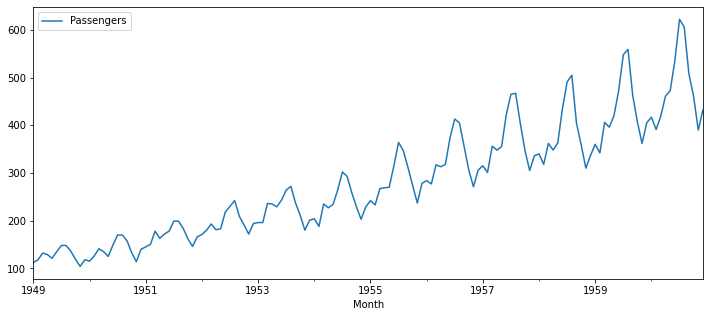

In [55]:
dair_series = dair.set_index('Month')
dair_series.index = pd.to_datetime(dair_series.index)

dair_series.plot(figsize=(12,5))
#plt.xlim('1959', '1961')
plt.show()

<div class="alert alert-info">
    <br>
    <b>Question: What trend and repetitive pattern can you identify just by looking at the plot?</b>      
    <br>
    <br>
</div>

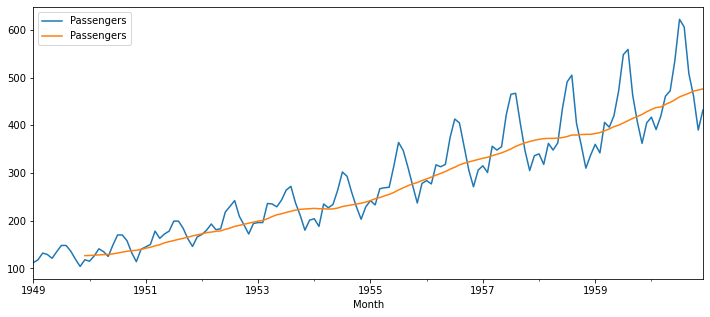

In [56]:
fig, ax = plt.subplots(figsize=(12,5))

dair_series.plot(ax=ax)
dair_series.rolling(12).mean().plot(ax=ax)

plt.show()

Doing a rolling average with few points loses me the initial year. It gives me the overall trend, but I also lose the seasonality of yearly number of passengers.

Let's take a look at some more advanced techniques that allow more rigorous analyses.

---

## STL decomposition

The STL "Seasonal and Trend decomposition using Loess" method can decompose data into several components. It employs polynomial dcomposition that, together with a user-defined periodicity, extracts three major components: Trend __T__, Seasonality __S__, and Residues __R__. You can also define if the model decomposes the data in an __additive__ or __multiplticative__ model. This means you can have your data __D__ represented as:

D = T + S + R

or

D = T * S * R

STL decomposition is good for the analysis of periodic economic KPIs, like electricity consumption through the day, number os passengers on public transportation, etc.. STL can quickly and robustely identify outliers. But remember: STL has no idea about holidays happening!

In [57]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
res = STL(dair_series).fit()

We now have a statsmodels object

In [59]:
res

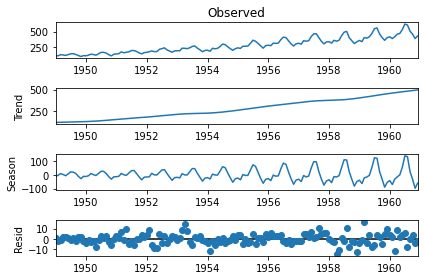

In [60]:
#fig, ax = plt.subplots()

figres = res.plot()
#plt.show()

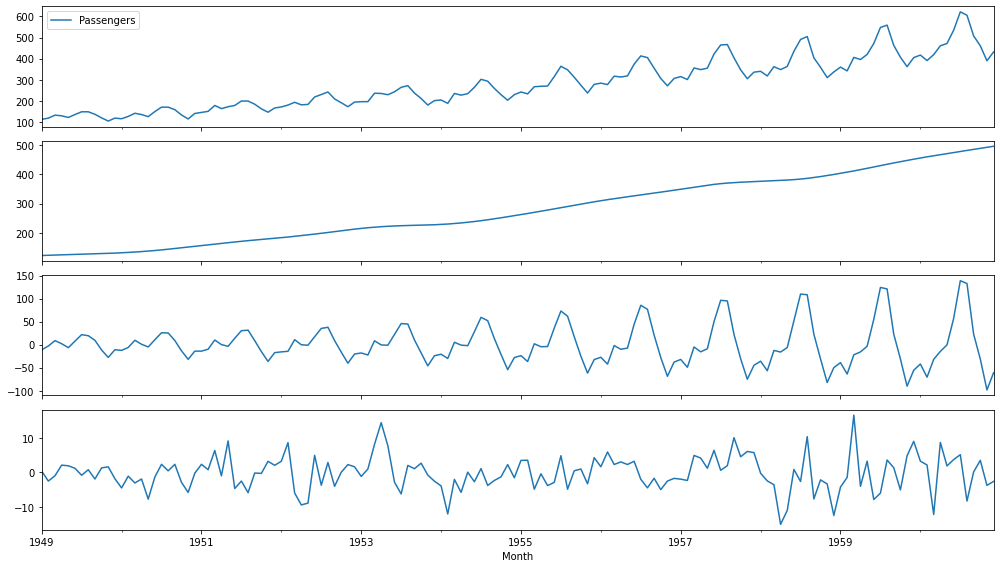

In [61]:
fig, ax = plt.subplots(figsize=(14,8), nrows=4, sharex=True)

res.observed.plot(ax=ax[0])

res.trend.plot(ax=ax[1])

res.seasonal.plot(ax=ax[2])

res.resid.plot(ax=ax[3])

plt.tight_layout()
plt.show()

Much like datetime, STL is smart, but not intteligent. It is a best practice to always make your period explicit in the code, if you know it beforehand. You can even use STL first to have an idea of what your period should be.

The __period__ is the number of data points you consider your data to repeat. In this case, we have monthly data, and it is a fair assessment to say the cycles look yearly. People used to travel during Summer, before covid.

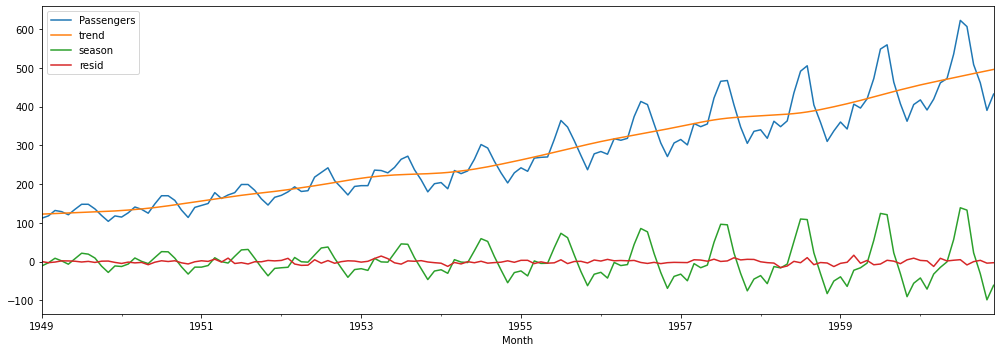

In [62]:
fig, ax = plt.subplots(figsize=(14,5), nrows=1, sharex=True)

res.observed.plot(ax=ax)

res.trend.plot(ax=ax)

res.seasonal.plot(ax=ax)

res.resid.plot(ax=ax)

plt.legend()
plt.tight_layout()
plt.show()

In [63]:
res = STL(dair_series, period=12).fit()

Remember that, by default, the model is __additive__. You can specify a __multiplicative__ model. The choice of the model depends on the data source. In this course, we'll only tackle __additive__ models.



If you wish to focus on the seasonal component, you can use a special version of __STL__, in a function called __seasonal_decompose__.

Since this method is a mix of moving averages and STL, you will also lose some information at the beginning and the end in your calculated trend.

In [64]:
sdc = seasonal_decompose(dair_series, period=12, model='multiplitcative')

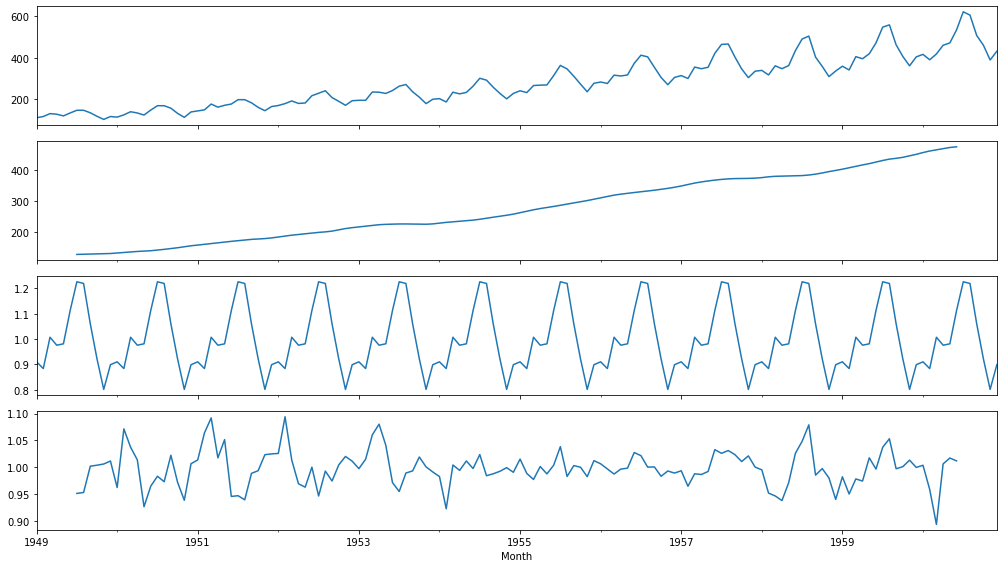

In [65]:
fig, ax = plt.subplots(figsize=(14,8), nrows=4, sharex=True)

sdc.observed.plot(ax=ax[0])

sdc.trend.plot(ax=ax[1])

sdc.seasonal.plot(ax=ax[2])

sdc.resid.plot(ax=ax[3])

plt.tight_layout()
plt.show()

Notice the missing points in the beginning and the end of the data interval, much like a moving average.

Decomposing data is a great way to analyse it. The next step is to [predict it](05.3-Forecasting.ipynb).